# Data Exploration for Credit Scoring Model
**Objective:** Understand the structure of the dataset.  
**Source:** https://www.kaggle.com/c/GiveMeSomeCredit

### Import Libraries

In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Load the Dataset

In [8]:
df = pd.read_csv('../data/raw/cs-training.csv', index_col=0)

### Preview the Data Structure and Features

In [13]:
# Display the first few rows
print(df.head())

# Display dataset information
print(df.info())

# Display shape of dataset
print('Dataset Shape: ' + str(df.shape))

   SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
1                 1                              0.766127   45   
2                 0                              0.957151   40   
3                 0                              0.658180   38   
4                 0                              0.233810   30   
5                 0                              0.907239   49   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
1                                     2   0.802982         9120.0   
2                                     0   0.121876         2600.0   
3                                     1   0.085113         3042.0   
4                                     0   0.036050         3300.0   
5                                     1   0.024926        63588.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
1                               13                        0   
2                                4                        0   

### View Statistical Summary

In [14]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


### Assessing Data Quality

In [19]:
# Calculating the number and percentage of missing values per column

missing_values = df.isnull().sum()
missing_values_percentage = (missing_values / len(df))

print("Missing Values per Column: \n")
print(missing_values)

print("\nMissing Values as Percentages per Column: \n")
print(missing_values_percentage)

Missing Values per Column: 

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

Missing Values as Percentages per Column: 

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.198207
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstat

In [29]:
num_zero = (df['MonthlyIncome'] == 0).sum()
print(f"There are {num_zero} rows with MonltyhIncome equal to 0.")

There are 1634 rows with MonltyhIncome equal to 0.


### Target Variable Analysis
**Target Variable:** *SeriousDlqin2yrs*

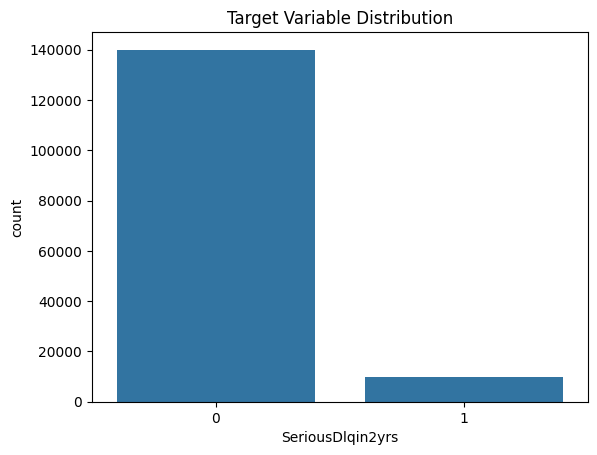

SeriousDlqin2yrs
0    93.316
1     6.684
Name: proportion, dtype: float64


In [27]:
# Distribution
sns.countplot(x='SeriousDlqin2yrs', data=df)
plt.title('Target Variable Distribution')
plt.show()

# Percentage Distribution
target_distribution_percentage = df['SeriousDlqin2yrs'].value_counts(normalize=True) * 100
print(target_distribution_percentage)


Due to the apparent class imbalance, possible solutions that may be implement at the model training stage/preprocessing stage include class weights and/or class upsampling of the minoriy class (SeriousDlqin2yrs=1)

### Univariate Analysis

##### Histogram Plots

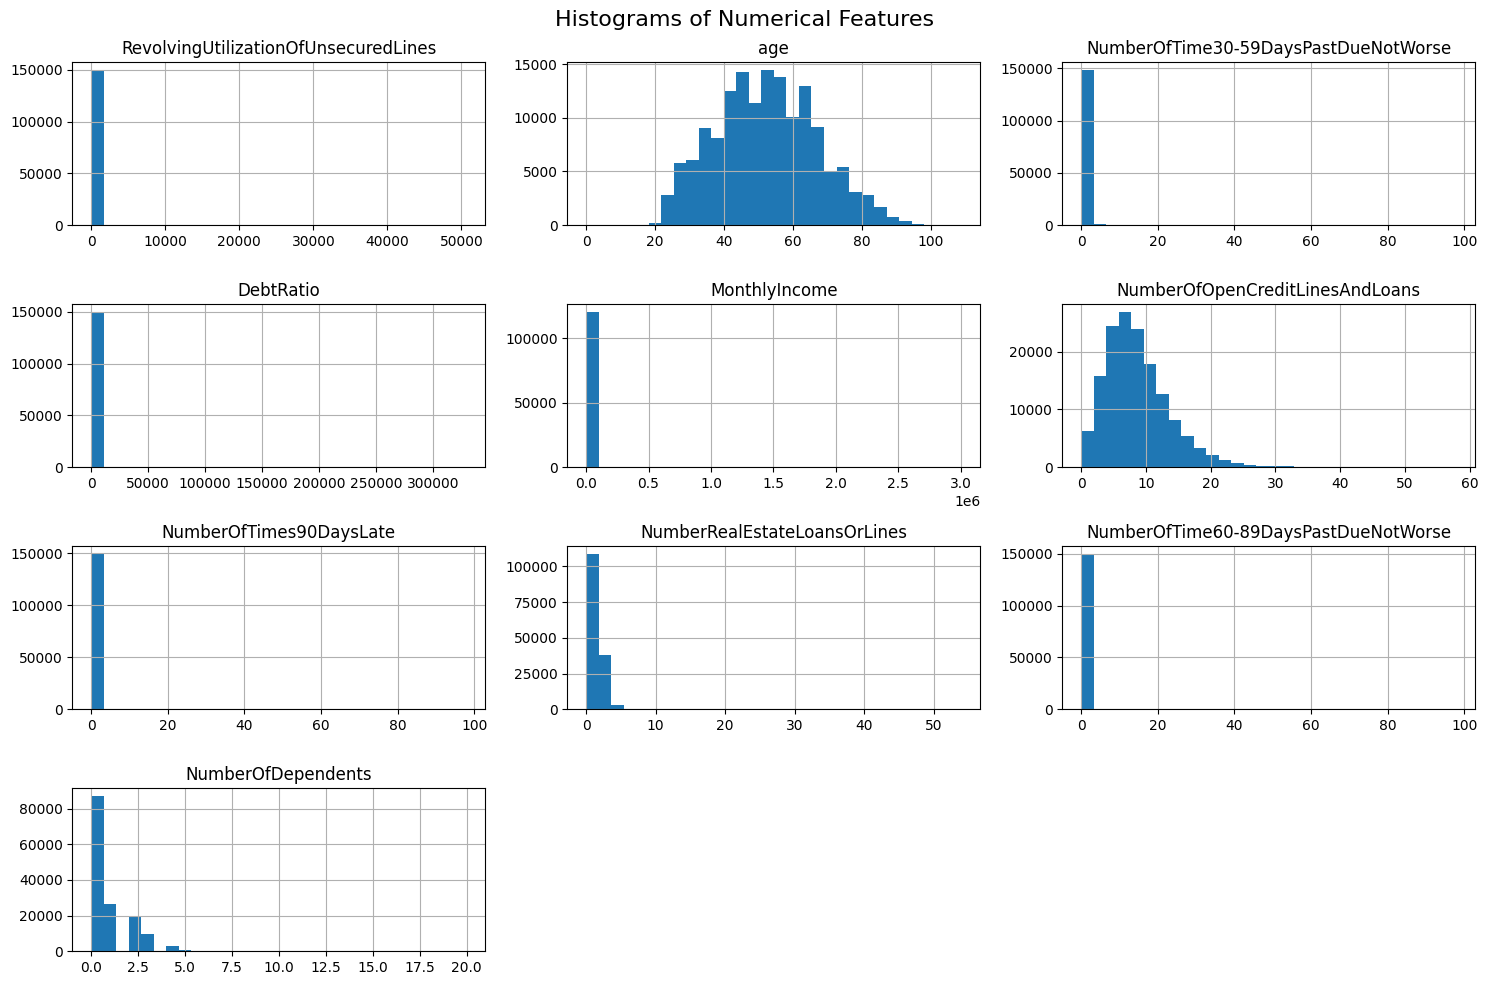

In [21]:
# List of numerical features in the dataset (excluding the target variable)
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Exclude the target variable
numerical_features.remove('SeriousDlqin2yrs')  

# Plot histograms for each numerical feature
df[numerical_features].hist(figsize=(15, 10), bins=30)
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

#### Kernel Density Estimate (KDE) Plots

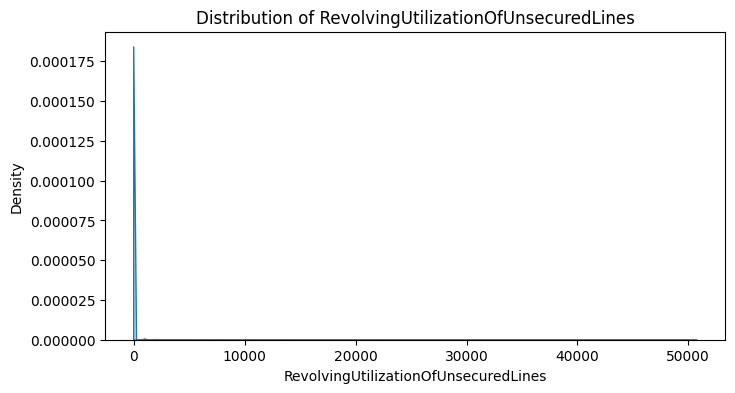

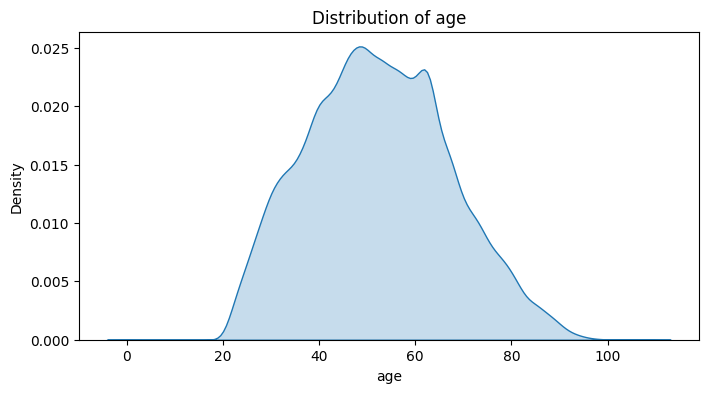

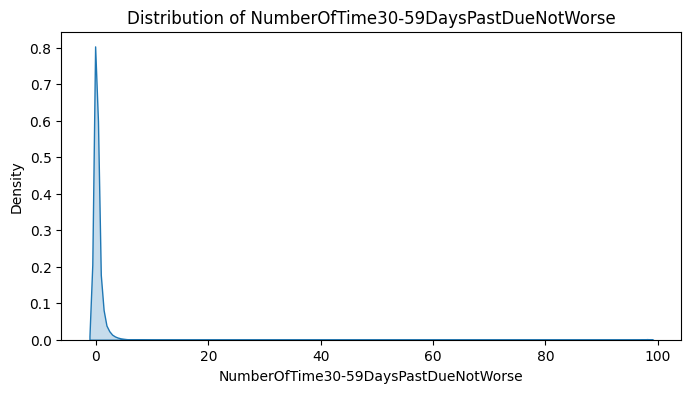

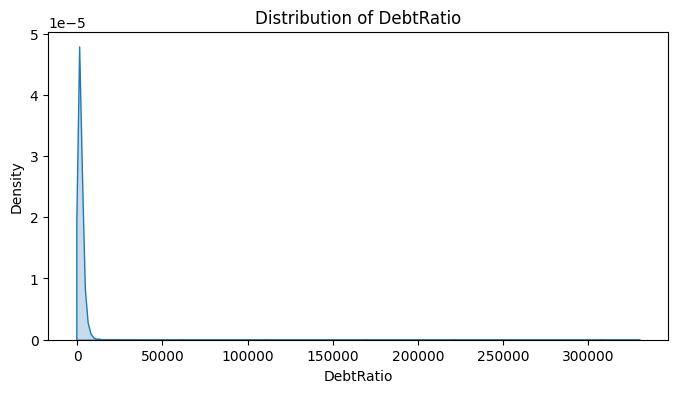

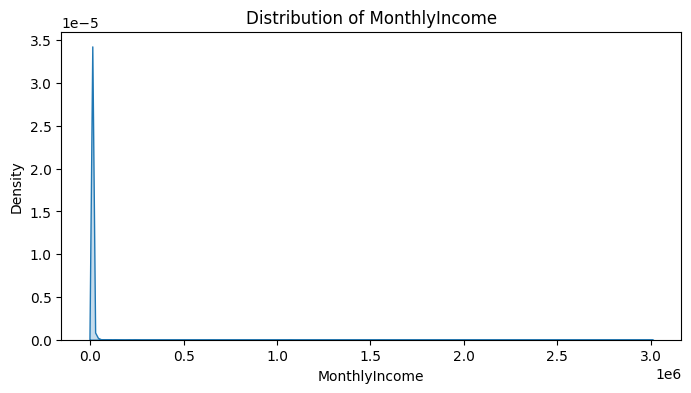

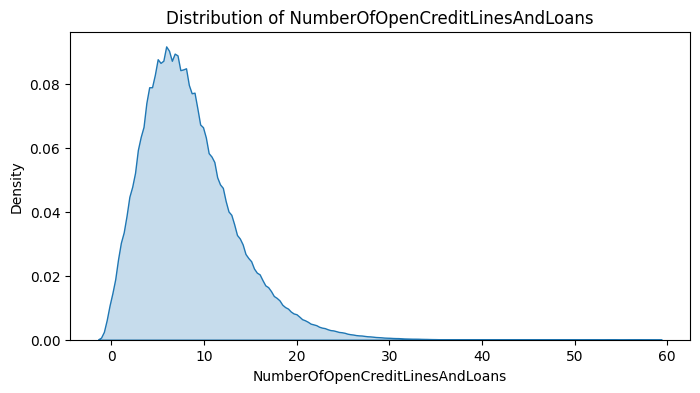

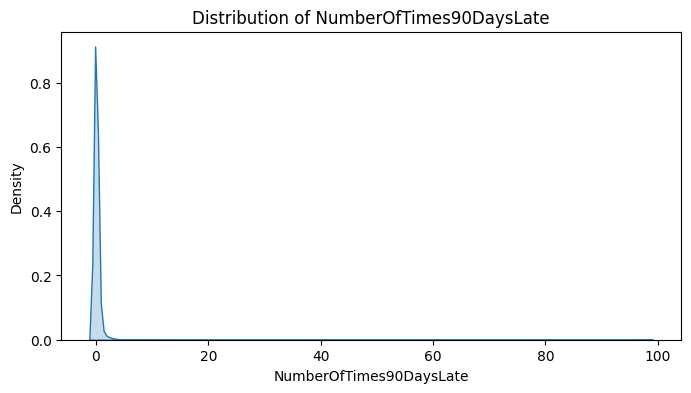

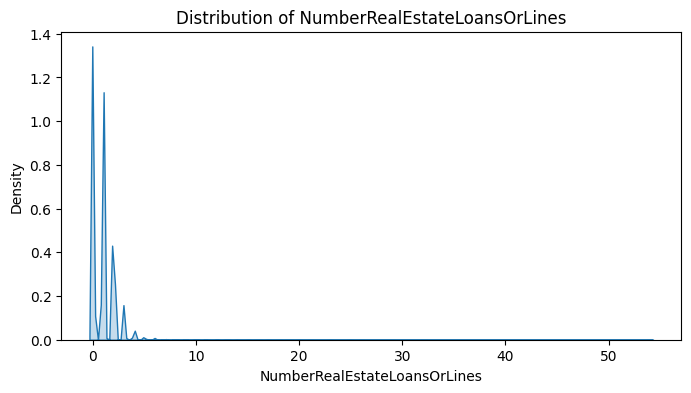

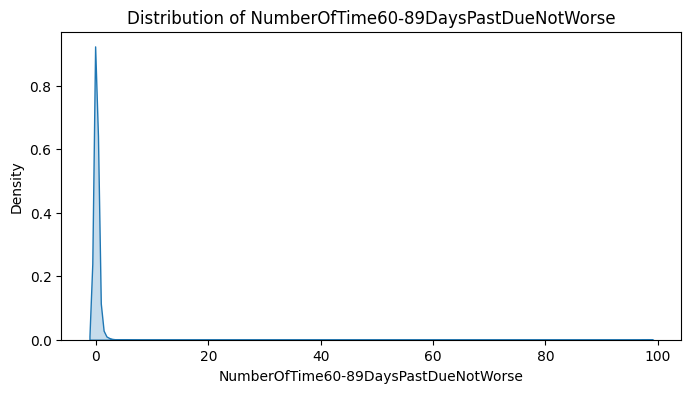

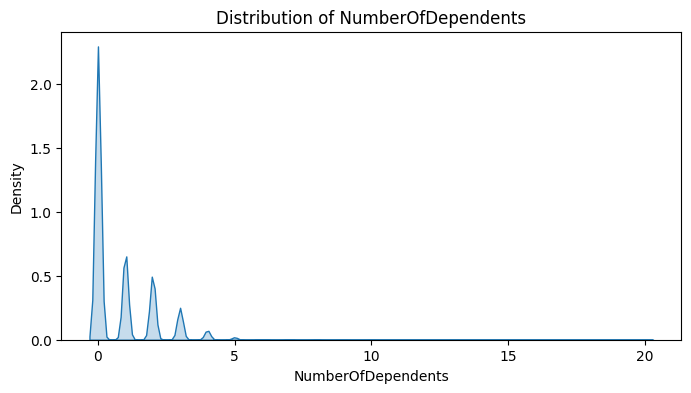

In [23]:
# Plot KDE for each numerical feature
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(df[feature], fill=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()

#### Box Plots for Outlier Detection

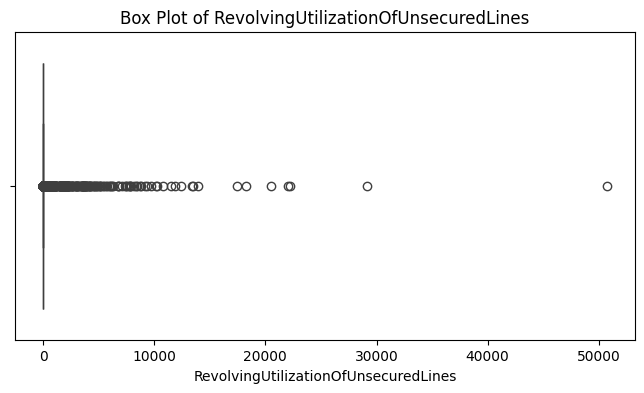

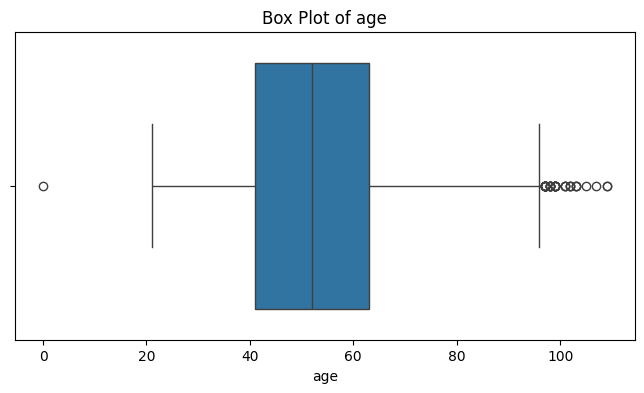

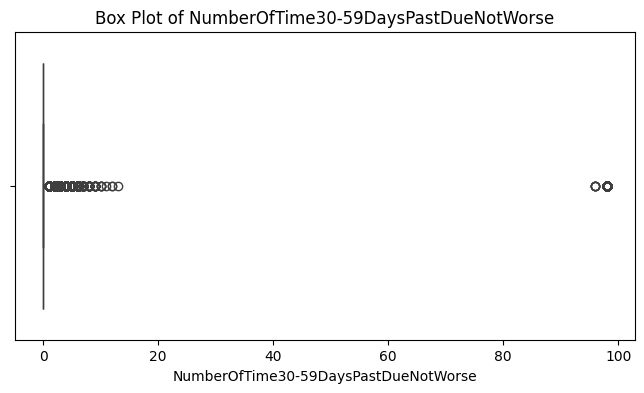

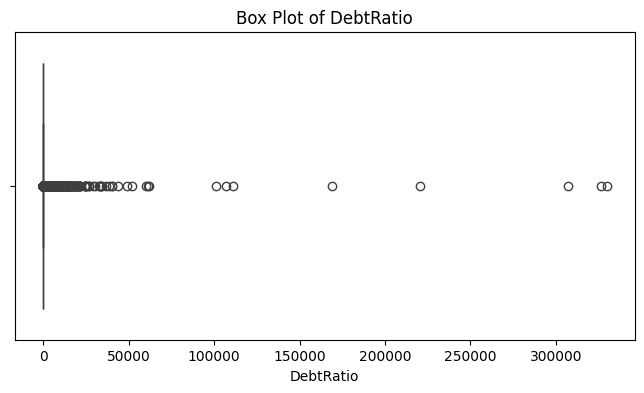

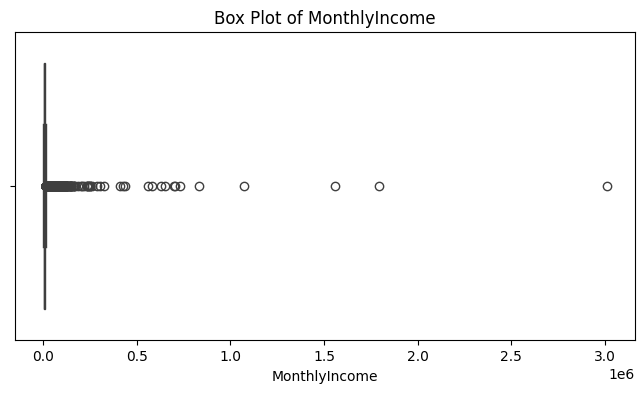

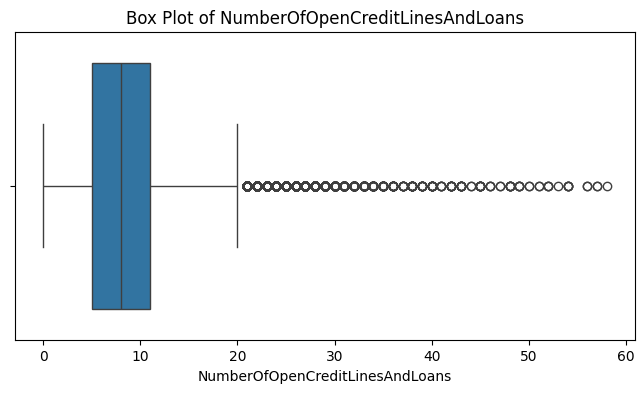

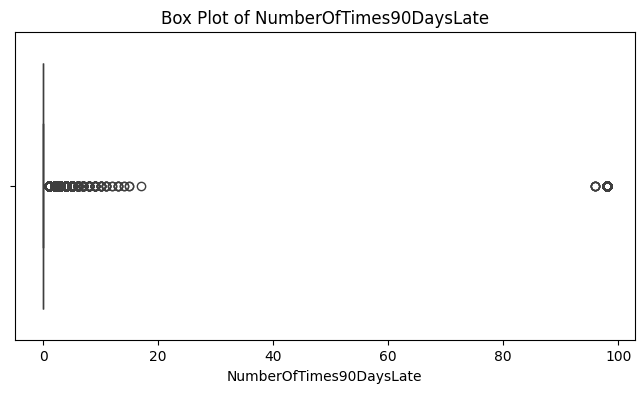

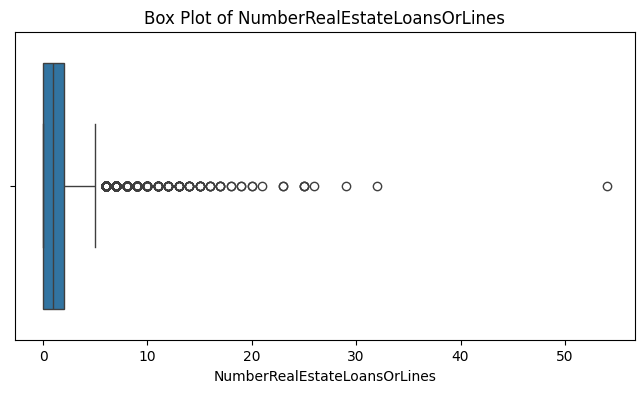

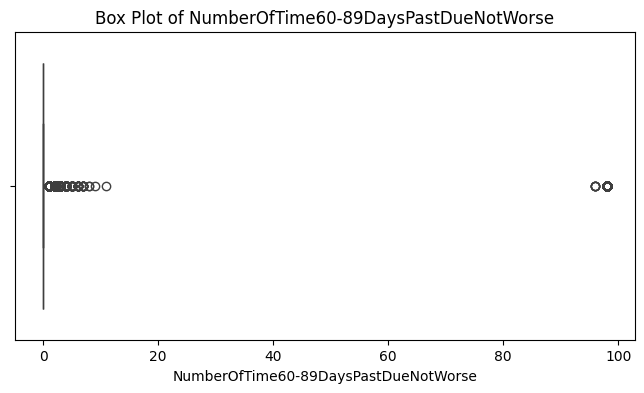

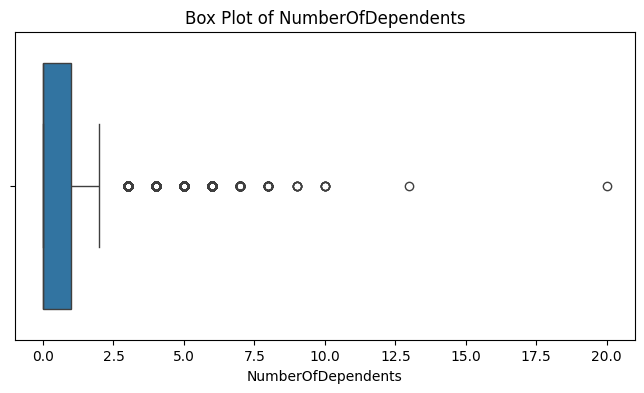

In [24]:
# Plot boxplots for each numerical feature to detect outliers
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)
    plt.show()

### Bivariate Analysis

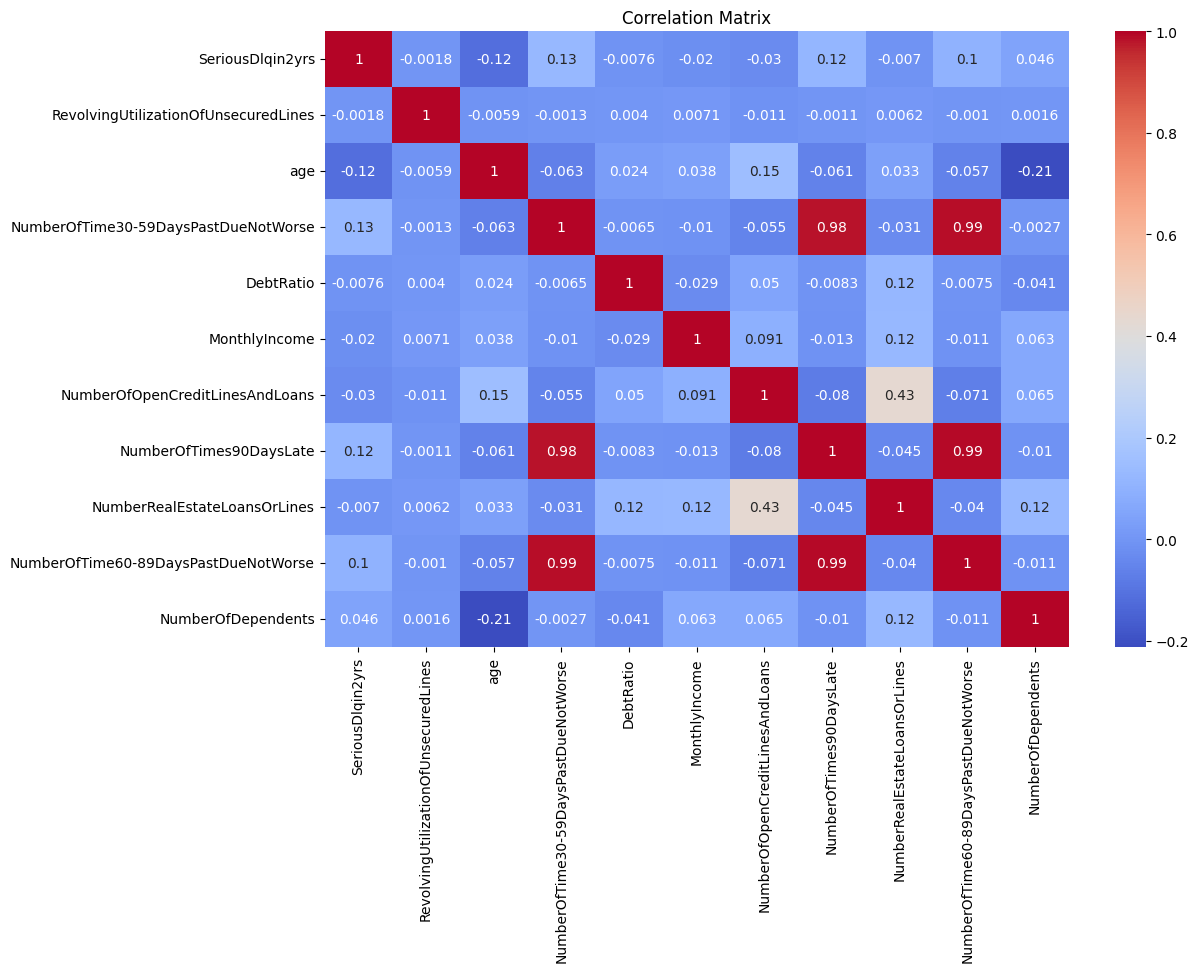

In [25]:
# Correlation matrix to visualize relationships between features
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Initial Observations

**Data Quality:**  
  
- There are about 30,000 missing values in the *MonthlyIncome* column and about 4,000 missing values in the *NumberOfDependents* column. These missing values will be handled via imputation to ensure accurate model performance.  
  

**Feature Distributions:**  
  
- The age feature has a roughly normal distribution, though there are outliers indicating some individuals may be much older than the majority of the dataset.  
  
- *RevolvingUtilizationOfUnsecuredLines* is right-skewed, indicating that most individuals are utilizing only a small percentage of their credit, with a few utilizing a large portion.  
  
- *DebtRatio* shows a wide range of values, with several extremely high values that seem to be indicitive of potential outliers.
  
**Correlations Between Features:**  
  
- *NumberOfTime30-59DaysPastDueNotWorse* and *NumberOfTimes90DaysLate* are highly correlated with each other and have moderate positive correlations with SeriousDlqin2yrs, indicating their importance in predicting financial delinquency.  
  
- Features such as *RevolvingUtilizationOfUnsecuredLines* and *DebtRatio* seem to have weaker correlations with the target but could still provide value for model predictions.  
  
**Target Variable Analysis:**  
  
The target variable, *SeriousDlqin2yrs*, is highly imbalanced, with approximately 93.3% of the instances classified as 0 (no delinquency) and only 6.7% classified as 1 (serious delinquency). Techniques such as resampling (e.g., oversampling the minority class) and/or adjusting class weights will be necessary to build a balanced and accurate predictive model.  

## Next Steps

- Handle Missing Values  
  
- Correct Data Types and Convert Features (e.g. Convert NumberOfDependents from float to int)  
  
- Feature Engineering (Tenative):  
    - DebtToIncomeRatio  
      
    - TotalPastDue  
      
    - AgeGroup  
      
- Encode Categorical Variables  
  
- Handle Class Imbalance  
  
- Prepare for Modeling Phase